# Análise Exploratória

Muitos atribuem essa fase como Data mining, onde de fato é feita uma mineração desses dados para obter insights sobre o negócio. Diria que essa etapa é a mais importa para o projeto de ML, pois aqui é onde será identificado se os dados são tendenciosos, se será possível obter um bom modelo preditivo, compreender o negócio através dos dados. Em alguns problemas de negócio, já é possível obter a resposta pretendida só com a aplicação dessa etapa.

Vamos iniciar esse trabalho:

In [1]:
#Importar as bibliotecas necessárias e criar o dataframe a partir do arquivo de dados.
import pandas as pd

dataframe = pd.read_csv("dataset/dataset_churn.csv")
dataframe.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Há várias formas de importar os dados (Directy Query, API, MS Excel...), nesse projeto estamos fazendo a importação de um arquivo CSV (Comma Separated Values), que ao importar utilizando a biblioteca Pandas, temos um dataframe (uma tabela) com as seguintes features (características ou variáveis):

* **Unnamed: 0:** coluna de indexação dos dados, começando com o índice 0;
* **RowNumber:** número do telefone do cliente;
* **CustomerId:** identificação do cliente;
* **Surname:** sobrenome do cliente;
* **CreditScore:** pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* **Geography:** país que o serviço é oferecido;
* **Gender:** sexo do cliente;
* **Age:** idade do cleinte;
* **Tenure:** um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.
* **Balance:** saldo da conta corrente;
* **NumOfProducts:** número de produtos bancários adquiridos;
* **HasCrCard:** se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* **IsActiveMember:** se é um cliente com conta ativa, (Ativo = 1) ;
* **EstimatedSalary:** salário estimado;
* **Exited:** cliente deixou de ser cliente do banco ou não (Churn = 1).

Explicando em poucas palavras e superficialmente, um dos trabalhos feitos com Machine Learning é identificar as correlações entre as variáveis do problema e identificar os padrões, para a máquina aprender a fazer previsões. Essas correlações e padrões dos dados, geralmente, expressam comportamentos daquilo que eles (os dados) estão representando.

Para desenvolver um algorítmo que realize a previsão de clientes que estão prestes a "dar Churn" (a cancelar a assinatura do serviço ou deixar de comprar o produto), o que importa são os dados que expressam o comportamento desses clientes. Os dados de identificação não representam um valor significativo para a resolução do problema. Portanto, dados que consistem na indexação, número de telefone, identificação e sobrenome, são descartados logo no início desse processo.

In [2]:
dataframe = dataframe.drop(["Unnamed: 0", "RowNumber", "CustomerId", "Surname"], axis= 1)

Assim, temos um dataframe de 11 colunas e 10000 registros. Caso fosse um dataset que houvesse dados faltantes, agora seria o momento de iniciar tratamentos de limpeza e/ou preenchimento das lacunas de informação. Mas no caso desse presente projeto, não há dados faltantes.

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Das 11 features que temos no dataframe, a **Exited** é nossa target variable (variável alvo). O que precisa ser previsto; se a pessoa vai sair ou não do quadro de clientes da empresa.

In [4]:
dataframe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


As variáveis CreditScore, Age, Balance e Estimated Salary, estão dispostos com uma grande variabilidade de números distintos. Considerando as duas últimas que representam valores monetários, é quase possível ter uma quantidade de números distindos do mesmo tamanho da amostragem. A melhor estratégia para evitar erro de análise e possível erro de treinamento do modelo, é realizar agrupamentos por faixa de valores.

Como critério de estipulação de faixa de valores, foi considerado os valores do Desvio Padrão de cada uma das Variáveis e a realidade do universo de dados (o valor máximo e evitar um número pequeno de grupos), resultando o seguinte:

|Variável|Desvio Padrão|Intervalo Estipulado|Nº de Grupos|
|--|--|--|--|
|_CreditScore_|96.65|100.00|10|
|_Age_|10.49|10.00|9|
|_Balance_|62,397.41|65,000.00|4|
|_EstimatedSalary_|57,510.49|50,000.00|4|

In [5]:
# Loop de criação dos grupos para as variáveis.

for i in range(0, len(dataframe["CreditScore"])):
    number = dataframe["CreditScore"][i]
    if number < 100:
        dataframe["CreditScore"][i] = 1
    elif number >= 100 and number < 200:
        dataframe["CreditScore"][i] = 2
    elif number >= 200 and number < 300:
        dataframe["CreditScore"][i] = 3
    elif number >= 300 and number < 400:
        dataframe["CreditScore"][i] = 4
    elif number >= 400 and number < 500:
        dataframe["CreditScore"][i] = 5
    elif number >= 500 and number < 600:
        dataframe["CreditScore"][i] = 6
    elif number >= 600 and number < 700:
        dataframe["CreditScore"][i] = 7
    elif number >= 700 and number < 800:
        dataframe["CreditScore"][i] = 8
    elif number >= 800 and number < 900:
        dataframe["CreditScore"][i] = 9
    elif number >= 900:
        dataframe["CreditScore"][i] = 10

for i in range(0, len(dataframe["Age"])):
    number = dataframe["Age"][i]
    if number < 18:
        dataframe["Age"][i] = 1
    elif number >= 18 and number < 30:
        dataframe["Age"][i] = 2
    elif number >= 30 and number < 40:
        dataframe["Age"][i] = 3
    elif number >= 40 and number < 50:
        dataframe["Age"][i] = 4
    elif number >= 50 and number < 60:
        dataframe["Age"][i] = 5
    elif number >= 60 and number < 70:
        dataframe["Age"][i] = 6
    elif number >= 70 and number < 80:
        dataframe["Age"][i] = 7
    elif number >= 80 and number < 90:
        dataframe["Age"][i] = 8
    elif number >= 90:
        dataframe["Age"][i] = 9

for i in range(0, len(dataframe["Balance"])):
    number = dataframe["Balance"][i]
    if number < 65000:
        dataframe["Balance"][i] = 1
    elif number >= 65000 and number < 130000:
        dataframe["Balance"][i] = 2
    elif number >= 130000 and number < 195000:
        dataframe["Balance"][i] = 3
    elif number >= 195000 and number < 260000:
        dataframe["Balance"][i] = 4
    
for i in range(0, len(dataframe["EstimatedSalary"])):
    number = dataframe["EstimatedSalary"][i]
    if number < 50000:
        dataframe["EstimatedSalary"][i] = 1
    elif number >= 50000 and number < 100000:
        dataframe["EstimatedSalary"][i] = 2
    elif number >= 100000 and number < 150000:
        dataframe["EstimatedSalary"][i] = 3
    elif number >= 150000 and number < 200000:
        dataframe["EstimatedSalary"][i] = 4

C:\Users\fabiano\AppData\Local\Temp\ipykernel_8356\1238971544.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["CreditScore"][i] = 7
C:\Users\fabiano\AppData\Local\Temp\ipykernel_8356\1238971544.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["CreditScore"][i] = 6
C:\Users\fabiano\AppData\Local\Temp\ipykernel_8356\1238971544.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["CreditScore"][i] = 

In [6]:
dataframe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,France,Female,4,2,1.0,1,1,1,3.0,1
1,7,Spain,Female,4,1,2.0,1,0,1,3.0,0
2,6,France,Female,4,8,3.0,3,1,0,3.0,1
3,7,France,Female,3,1,1.0,2,0,0,2.0,0
4,9,Spain,Female,4,2,2.0,1,1,1,2.0,0


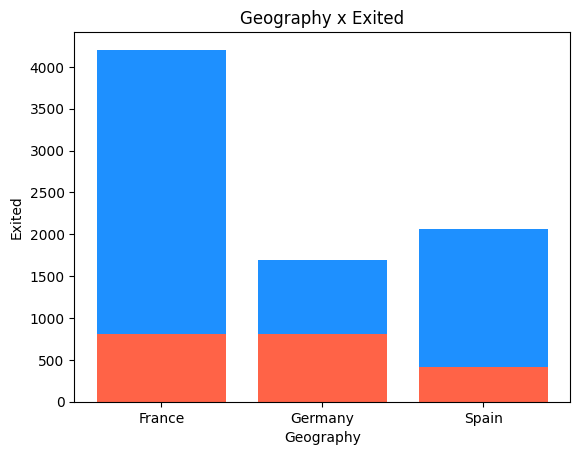

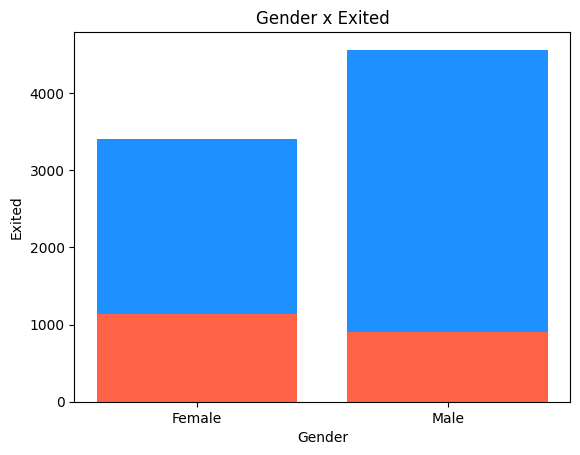

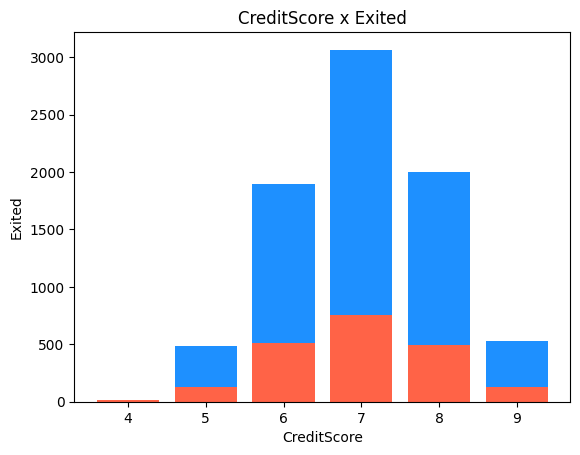

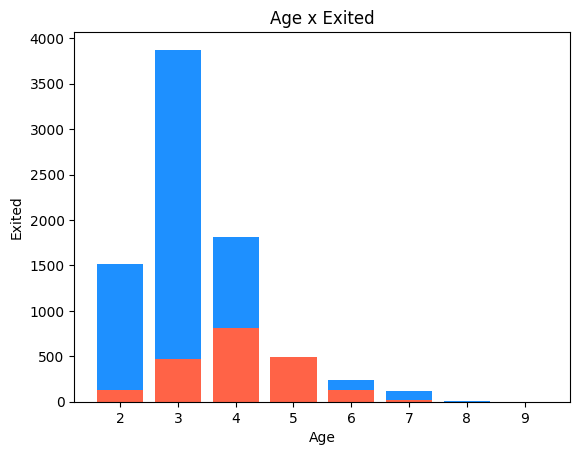

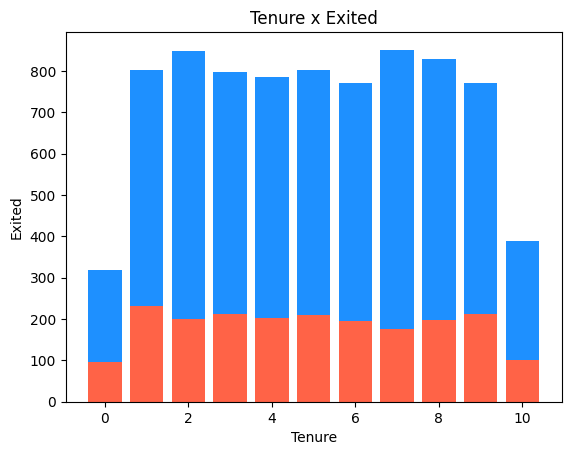

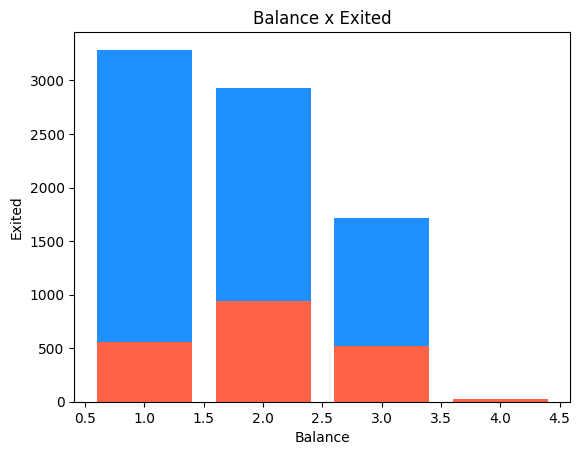

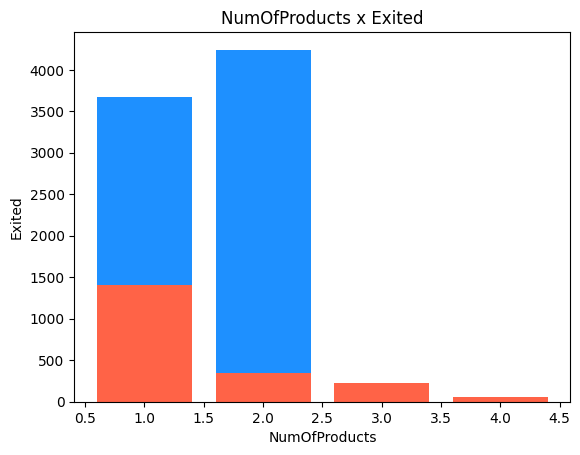

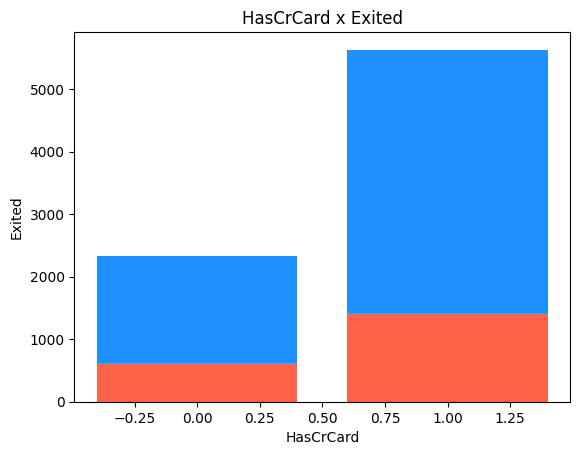

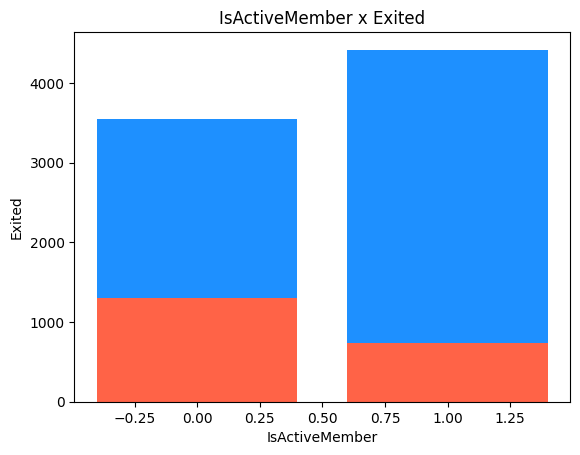

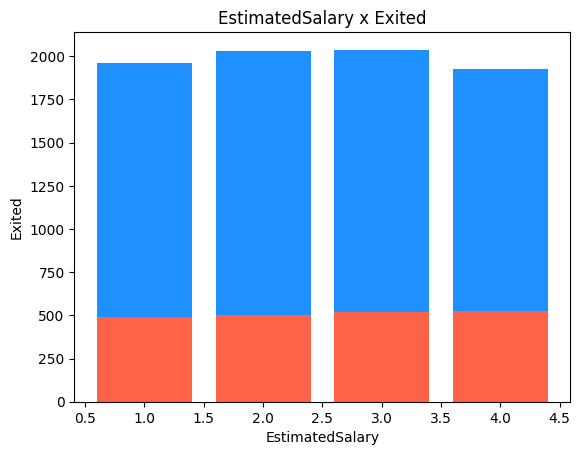

In [7]:
import matplotlib.pyplot as plt

features = ['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i in features:
    clientes = dataframe[dataframe["Exited"] == 0]
    saidas = dataframe[dataframe["Exited"] == 1]
    notchurn = clientes.groupby([i], as_index=False).count()
    churn = saidas.groupby([i], as_index=False).count()

    plt.bar(notchurn[i], notchurn["Exited"], color="#1E90FF")
    plt.bar(churn[i], churn["Exited"], color="#FF6347")
    plt.xlabel(i)
    plt.ylabel("Exited")
    plt.title(f'{i} x Exited')
    plt.show();

C:\Users\fabiano\AppData\Local\Temp\ipykernel_8356\2313058589.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()


<Axes: >

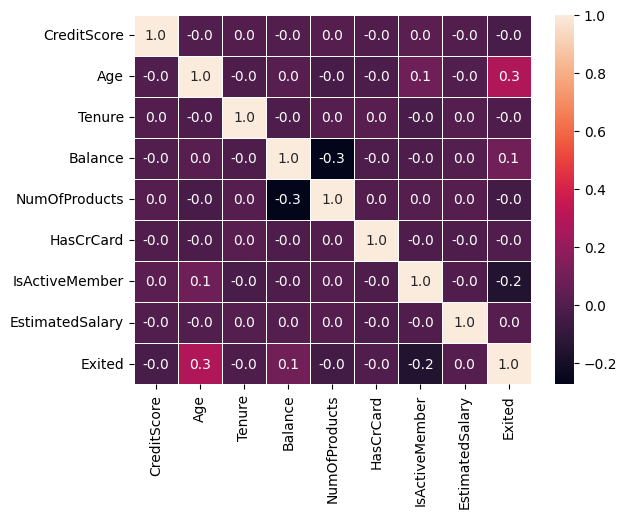

In [8]:
import seaborn as sn

correlation = dataframe.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [9]:
teste = dataframe.corr()
teste

C:\Users\fabiano\AppData\Local\Temp\ipykernel_8356\602474516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teste = dataframe.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.001345,0.004722,-0.001035,0.012882,-0.005066,0.028264,-0.001982,-0.024917
Age,-0.001345,1.000000,-0.009820,0.016751,-0.030245,-0.014858,0.087735,-0.003404,0.276526
Tenure,0.004722,-0.009820,1.000000,-0.011063,0.013444,0.022583,-0.028362,0.005946,-0.014001
Balance,-0.001035,0.016751,-0.011063,1.000000,-0.273217,-0.012355,-0.010454,0.009083,0.099709
NumOfProducts,0.012882,-0.030245,0.013444,-0.273217,1.000000,0.003183,0.009612,0.015127,-0.047820
HasCrCard,-0.005066,-0.014858,0.022583,-0.012355,0.003183,1.000000,-0.011866,-0.010471,-0.007138
IsActiveMember,0.028264,0.087735,-0.028362,-0.010454,0.009612,-0.011866,1.000000,-0.007695,-0.156128
EstimatedSalary,-0.001982,-0.003404,0.005946,0.009083,0.015127,-0.010471,-0.007695,1.000000,0.013660
Exited,-0.024917,0.276526,-0.014001,0.099709,-0.047820,-0.007138,-0.156128,0.013660,1.000000


In [ ]:


features = ['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i in features:
    clientes = dataframe[dataframe["Exited"] == 0]
    saidas = dataframe[dataframe["Exited"] == 1]
    notchurn = clientes.groupby([i], as_index=False).count()
    churn = saidas.groupby([i], as_index=False).count()

    plt.bar(notchurn[i], notchurn["Exited"], color="#1E90FF")
    plt.bar(churn[i], churn["Exited"], color="#FF6347")
    plt.xlabel(i)
    plt.ylabel("Exited")
    plt.title(f'{i} x Exited')
    plt.show();

# Pontos de Melhoria do Projeto

1. O algorítimo foi desenvolvido considerando apenas a base de dados utilizado. É ideal construir o algorítimo considerando novas entradas de dados. Como por exemplo, para determinar os grupos de dados das variáveis CreditScore, Age, Balance e EstimatedSalary, foi utilizado o valor aproximado de desvio padrão de cada uma. O ideal é construir um algorítimo que a cada entrada de novos dados, recalule esses grupos.